In [24]:
### Here we are going to import packages for our analysis
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import itertools

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import gensim
from gensim import corpora, models
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import os
import nltk.stem as stemmer
from pprint import pprint
import itertools
import requests
import gensim
import pandas as pd
import os
import collections
import smart_open
from nltk.tokenize import RegexpTokenizer
import gensim.models.doc2vec
import multiprocessing
import numpy as np
from scipy.sparse import csr_matrix
import nltk.tokenize 
from gensim.models.doc2vec import TaggedDocument
import pickle
import seaborn as sns
from string import digits
from collections import namedtuple
import math
import matplotlib 
from datetime import timedelta
import matplotlib.pyplot as plt
import re
import pickle
import sys
import re
import csv
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys
import numpy as np
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import csv
from sklearn.externals import joblib
from string import digits
import bz2
from collections import Counter
import plotly
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
plotly.tools.set_credentials_file(username='alphonse.m.simon', api_key='tL4FDjpWNTU1xUf5sXEl')
from bs4 import BeautifulSoup
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import plotly.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
stemmer = PorterStemmer()
np.random.seed(2018)
nltk.download('wordnet')
import xlsxwriter
from xlrd import open_workbook

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alpho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [26]:
path_link = "C:/Users/alpho/Dropbox/NLP - STEM"
os.chdir(path_link)

In [27]:
basketball = pd.read_excel(open('./Presentation/example.xlsx','rb'), sheet_name=0)


In [28]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [29]:
basketball['clean_texts'] = basketball['text'].map(preprocess)

In [30]:
data_words = basketball['clean_texts'].tolist()

In [31]:
print(data_words[0])

['year', 'rumor', 'anthoni', 'davi', 'exodu', 'orlean', 'domin', 'discours', 'trade', 'superstar', 'player', 'defin', 'gener', 'rare', 'happen', 'prime', 'player', 'career', 'caus', 'seismic', 'shift', 'like', 'warrior', 'trade', 'wilt', 'chamberlain', 'sixer', 'kareem', 'abdul', 'jabbar', 'deal', 'buck', 'laker', 'davi', 'pelican', 'candid', 'defin', 'calendar', 'year', 'team', 'prepar', 'possibl', 'year', 'pelican', 'davi', 'unrestrict', 'free', 'agent', 'davi', 'indic', 'long', 'orlean', 'enter', 'offseason', 'leagu', 'sourc', 'expect', 'pelican', 'trade', 'wait', 'past', 'summer', 'risk', 'pelican', 'lose', 'leverag', 'davi', 'simpli', 'walk', 'free', 'agenc', 'opt', 'contract', 'davi', 'long', 'drop', 'hint', 'potenti', 'departur', 'admit', 'concern', 'stay', 'long', 'orlean', 'like', 'kevin', 'garnett', 'minnesota', 'recent', 'comment', 'valu', 'legaci', 'money', 'trade', 'smoke', 'blow', 'davi', 'buy', 'million', 'home', 'westlak', 'villag', 'suburb', 'angel', 'summer', 'switch'

In [32]:
print(data_words[2])

['lton', 'brand', 'march', 'young', 'execut', 'wasn', 'long', 'player', 'career', 'pretti', 'sure', 'finish', 'play', 'talk', 'put', 'retir', 'extrem', 'heist', 'movi', 'narrat', 'voic', 'januari', 'brand', 'atlanta', 'hawk', 'part', 'way', 'brand', 'sixer', 'delic', 'period', 'process', 'sixer', 'lose', 'game', 'lot', 'hope', 'short', 'suppli', 'sixer', 'debat', 'jahlil', 'okafor', 'nerlen', 'noel', 'floor', 'time', 'reflex', 'convent', 'wisdom', 'town', 'sport', 'radio', 'caller', 'crusti', 'media', 'type', 'hold', 'team', 'need', 'veteran', 'presenc', 'favor', 'provinci', 'parlanc', 'adult', 'locker', 'room', 'imagin', 'angri', 'accent', 'philadelphian', 'kid', 'day', 'shtick', 'brand', 'suppos', 'cure', 'dunno', 'wear', 'jean', 'explain', 'team', 'someth', 'rough', 'video', 'game', 'wasn', 'entir', 'sure', 'brand', 'eventu', 'sign', 'sixer', 'go', 'vacat', 'week', 'power', 'flex', 'execut', 'fuck', 'leav', 'clearli', 'come', 'term', 'know', 'wash', 'brand', 'play', 'game', 'season'

In [33]:
stopwords = ['student', 'cours', 'includ', 'topic', 'network', 'system', 'concept', 'fundament', 'skill', 'learn', 
            'complet', 'introduc', 'inform', 'cover', 'abil', 'abl', 'apprentic']
for i in range(len(data_words)): 
    for x in stopwords: 
        try: 
            data_words[i][:] = [z for z in data_words[i] if z != x]
        except ValueError: 
            continue

In [34]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

In [35]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [36]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [37]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 6), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 3), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 1), (29, 1), (30, 8), (31, 2), (32, 1), (33, 2), (34, 1), (35, 5), (36, 2), (37, 1), (38, 5), (39, 1), (40, 3), (41, 6), (42, 1), (43, 1), (44, 1), (45, 5), (46, 1), (47, 3), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 3), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 3), (74, 1), (75, 2), (76, 9), (77, 1), (78, 1), (79, 1), (80, 1), (81, 9), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 10), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 7), (108, 2), (109, 9), (110, 1

In [38]:
print(id2word[0])

abdul


In [39]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abdul', 1),
  ('absorb', 1),
  ('accept', 2),
  ('accord', 1),
  ('acquir', 6),
  ('acquisit', 1),
  ('activ', 1),
  ('add', 1),
  ('admit', 1),
  ('advanc', 1),
  ('agenc', 2),
  ('agent', 3),
  ('agreement', 1),
  ('ahead', 3),
  ('akana', 1),
  ('allonzo', 1),
  ('amazon', 1),
  ('amick', 1),
  ('ammo', 1),
  ('andi', 1),
  ('angel', 4),
  ('anger', 1),
  ('ankl', 1),
  ('annual', 1),
  ('antetokounmpo', 1),
  ('anthoni', 3),
  ('appeal', 1),
  ('approach', 2),
  ('arena', 1),
  ('asik', 1),
  ('asset', 8),
  ('athlet', 2),
  ('attempt', 1),
  ('attend', 2),
  ('automat', 1),
  ('avail', 5),
  ('averag', 2),
  ('away', 1),
  ('ball', 5),
  ('bargain', 1),
  ('base', 3),
  ('beal', 6),
  ('begin', 1),
  ('belief', 1),
  ('benefit', 1),
  ('best', 5),
  ('bet', 1),
  ('better', 3),
  ('bid', 1),
  ('blazer', 2),
  ('blockbust', 1),
  ('bloomer', 1),
  ('blow', 1),
  ('bluff', 1),
  ('bonu', 2),
  ('boogi', 1),
  ('bosh', 3),
  ('boston', 3),
  ('bradley', 1),
  ('brandon', 1),
  (

In [42]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"say" + 0.007*"trump" + 0.006*"pelosi" + 0.006*"women" + '
  '0.006*"democrat" + 0.005*"year" + 0.004*"time" + 0.004*"game" + '
  '0.004*"play" + 0.004*"defens"'),
 (1,
  '0.012*"team" + 0.010*"davi" + 0.009*"season" + 0.008*"player" + '
  '0.007*"like" + 0.007*"point" + 0.006*"game" + 0.006*"year" + 0.006*"trade" '
  '+ 0.006*"laker"')]


In [44]:
lda_dictionary_temp = {}
lda_dictionary = {}
lda_dataframe = {}
for x in lda_model.print_topics(): 
    lda_dictionary_temp[str(x[0])] = x[1].split('+')
    lda_dictionary_temp[str(x[0])] = [word.split('*') for word in lda_dictionary_temp[str(x[0])]]

In [45]:
df = pd.DataFrame(lda_dictionary_temp['0'][1:],columns= ['Coefficient/weight', 'Stub/word'])

In [48]:
for i in range(0,2):
    lda_dictionary[str(i)] = pd.DataFrame(lda_dictionary_temp[str(i)][0:],columns= ['Weight', 'Word'])

In [49]:
i = 3
z = 0
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/Topics by Class.xlsx', engine='xlsxwriter')
workbook  = writer.book

for x in lda_dictionary: 
    i = i + 2
    lda_dictionary[x].to_excel(writer, sheet_name='Topics by Classes', startcol = i, startrow = 2, index=False)
x = 3
worksheet = writer.sheets['Topics by Classes']
for i in range(0,len(lda_dictionary)): 
    x = x + 2
    z = z+1
    worksheet.write(1, x, "Topic " + str(0 + z))

writer.save()



In [50]:
df

,Coefficient/weight,Stub/word
0,0.007,"""trump"""
1,0.006,"""pelosi"""
2,0.006,"""women"""
3,0.006,"""democrat"""
4,0.005,"""year"""
5,0.004,"""time"""
6,0.004,"""game"""
7,0.004,"""play"""
8,0.004,"""defens"""


In [51]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.6084993009512525

Coherence Score:  0.35558021785953303


In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.083125  0.0       1        1  67.279282
0     -0.083125  0.0       2        1  32.720715, topic_info=     Category        Freq       Term       Total  loglift  logprob
term                                                              
744   Default   68.000000        say   68.000000  30.0000  30.0000
115   Default  111.000000       davi  111.000000  29.0000  29.0000
2400  Default   31.000000     pelosi   31.000000  28.0000  28.0000
2741  Default   31.000000      women   31.000000  27.0000  27.0000
2318  Default   32.000000   democrat   32.000000  26.0000  26.0000
2352  Default   18.000000       hous   18.000000  25.0000  25.0000
553   Default  130.000000       team  130.000000  24.0000  24.0000
780   Default   15.000000    winslow   15.000000  23.0000  23.0000
389   Default   55.000000    pelican   55.000000  22.0000  22.0000
2484  Default   15.000000     corpor   15.000000  21.0000  21.0000
2347  Default   21.000000     govern   21.000000  20.0000  20.0000
284   Default   62.000000      laker   62.000000  19.0000  19.0000
570   Default   64.000000      trade   64.000000  18.0000  18.0000
2492  Default   14.000000     divers   14.000000  17.0000  17.0000
840   Default   15.000000    compani   15.000000  16.0000  16.0000
762   Default   17.000000       tell   17.000000  15.0000  15.0000
2252  Default   13.000000       vote   13.000000  14.0000  14.0000
576   Default   87.000000      trump   87.000000  13.0000  13.0000
393   Default   43.000000       pick   43.000000  12.0000  12.0000
188   Default   25.000000      floor   25.000000  11.0000  11.0000
398   Default   88.000000     player   88.000000  10.0000  10.0000
610   Default   31.000000       work   31.000000   9.0000   9.0000
247   Default   31.000000     ingram   31.000000   8.0000   8.0000
519   Default   36.000000       star   36.000000   7.0000   7.0000
1589  Default   22.000000     nation   22.000000   6.0000   6.0000
2471  Default   10.000000      woman   10.000000   5.0000   5.0000
2387  Default    8.000000      minor    8.000000   4.0000   4.0000
2945  Default    8.000000       goff    8.000000   3.0000   3.0000
1343  Default    9.000000      river    9.000000   2.0000   2.0000
1284  Default   11.000000       issu   11.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
2371   Topic2    8.269858     legisl    9.565346   0.9716  -6.4304
762    Topic2   13.921018       tell   17.070045   0.9132  -5.9096
2347   Topic2   17.024340     govern   21.632231   0.8776  -5.7083
1284   Topic2    9.546684       issu   11.903221   0.8965  -6.2868
2433   Topic2    8.991321   shutdown   11.150738   0.9019  -6.3467
902    Topic2    8.984481       hold   11.152149   0.9010  -6.3475
1009   Topic2    8.951666       room   11.158930   0.8968  -6.3511
684    Topic2    7.470518       heat    8.863267   0.9462  -6.5320
2302   Topic2    8.338523   congress   10.418381   0.8945  -6.4221
2333   Topic2    9.828273      email   13.579489   0.7939  -6.2577
188    Topic2   15.229551      floor   25.471918   0.6028  -5.8197
576    Topic2   35.402813      trump   87.212997   0.2156  -4.9762
1589   Topic2   13.458250     nation   22.368980   0.6091  -5.9434
610    Topic2   16.543316       work   31.271046   0.4805  -5.7370
655    Topic2   20.806957     defens   48.601837   0.2688  -5.5077
2409   Topic2   18.516289     presid   40.402870   0.3369  -5.6243
566    Topic2   22.017702       time   59.625572   0.1209  -5.4511
494    Topic2   20.142550       sign   52.207985   0.1648  -5.5401
397    Topic2   21.131027       play   61.543198   0.0482  -5.4922
614    Topic2   24.546492       year   87.721436  -0.1564  -5.3424
2549   Topic2   12.051757  administr   20.925114   0.5654  -6.0538
202    Topic2   21.641203       game   88.321671  -0.2892  -5.4684
106    Topic2   12.316641      court   24.339275   0.4360  -6.0320
210    To

In [26]:
lda_model_p = lda_model

In [27]:
filename = 'lda_model_cc'
outfile = open(filename,'wb')
pickle.dump(lda_model_p,outfile)
outfile.close()

In [28]:
filename = 'corpus_cc'
outfile = open(filename,'wb')
pickle.dump(corpus,outfile)
outfile.close()

In [29]:
filename = 'id2word_cc'
outfile = open(filename,'wb')
pickle.dump(id2word,outfile)
outfile.close()

In [30]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=community_college['clean_texts']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)




In [31]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.8901,"write, develop, research, requir, chart, varie...","[develop, essay, form, document, essay, instru..."
1,1,7.0,0.6659,"instal, configur, certif, prepar, oper, troubl...","[terminolog, data, commun, servic, model, topo..."
2,2,2.0,0.6731,"softwar, hardwar, user, oper, function, busi, ...","[comput, nomenclatur, particularli, respect, p..."
3,3,7.0,0.8977,"instal, configur, certif, prepar, oper, troubl...","[provid, detail, hardwar, oper, instal, config..."
4,4,0.0,0.6862,"project, analysi, manag, design, evalu, social...","[enabl, varieti, project, manag, techniqu, app..."
5,5,3.0,0.7440,"support, data, design, databas, secur, window,...","[provid, knowledg, necessari, instal, configur..."
6,6,3.0,0.3956,"support, data, design, databas, secur, window,...","[provid, knowledg, practic, experi, perform, t..."
7,7,0.0,0.8540,"project, analysi, manag, design, evalu, social...","[depth, look, social, legal, ethic, issu, rela..."
8,8,3.0,0.4895,"support, data, design, databas, secur, window,...","[broad, overview, secur, relat, secur, cryptog..."
9,9,3.0,0.6192,"support, data, design, databas, secur, window,...","[construct, page, contain, anim, graphic, form..."


In [32]:
print(df_dominant_topic['Text'][0])

['develop', 'essay', 'form', 'document', 'essay', 'instruct', 'practic', 'expositori', 'write', 'emphasi', 'clariti', 'central', 'support', 'idea', 'adequ', 'develop', 'logic', 'organ', 'coher', 'appropri', 'cite', 'primari', 'secondari', 'sourc', 'grammat', 'mechan', 'accuraci', 'gordon', 'rule', 'requir', 'demonstr', 'colleg', 'level', 'write', 'multipl', 'assign']


In [33]:
print(community_college['Text'][0])

Development of essay form, including documented essay; instruction and practice in expository writing. Emphasis on clarity of central and support ideas, adequate development, logical organization, coherence, appropriate citing of primary and/or secondary sources, and grammatical and mechanical accuracy. Gordon Rule course in which the student is required to demonstrate college-level writing skills through multiple assignments.


In [34]:
index_list = []

for x in df_dominant_topic['Dominant_Topic'].unique(): 
    df = df_dominant_topic.loc[lambda df_dominant_topic: df_dominant_topic['Dominant_Topic'] == x]
    num = df['Topic_Perc_Contrib'].idxmax()
    value = df['Topic_Perc_Contrib'][num]
    tup = [x, num, value ]
    index_list.append(tup)
    print(value)

0.9659000039100647
0.9646999835968018
0.7803000211715698
0.9276999831199646
0.9491000175476074
0.9312999844551086
0.972000002861023
0.9365000128746033


In [35]:
print(index_list)

[[6.0, 32, 0.9659000039100647], [7.0, 49, 0.9646999835968018], [2.0, 74, 0.7803000211715698], [0.0, 147, 0.9276999831199646], [3.0, 38, 0.9491000175476074], [4.0, 88, 0.9312999844551086], [1.0, 46, 0.972000002861023], [5.0, 41, 0.9365000128746033]]


In [36]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9277,"project, analysi, manag, design, evalu, social, think, technolog, life, market","[analysi, design, project, manag, provid, review, applic, life, cycl, develop, methodolog, proje..."
1,1.0,0.9720,"program, pend, mathemat, quantit, definit, java, object, statist, enhanc, design","[design, teach, basic, method, object, orient, design, java, program, practic, problem, illustr,..."
2,2.0,0.7803,"softwar, hardwar, user, oper, function, busi, demonstr, understand, compon, memori","[purpos, provid, understand, role, oper, interact, hardwar, compon, applic, softwar, work, power..."
3,3.0,0.9491,"support, data, design, databas, secur, window, softwar, applic, emphasi_place, microsoft","[terminolog, oper, necessari, comput, emphasi, place, basic, function, familiar, introduct, term..."
4,4.0,0.9313,"commun, work, person, practic, effect, oral, group, experi, varieti, principl","[occup, work, experi, educ, supervis, employ, design, provid, realist, experi, work, ultim, goal..."
5,5.0,0.9365,"program, problem, develop, solv, design, emphasi_place, structur, econom, logic, solut","[introductori, provid, problem, solv, program, develop, user, applic, emphasi, place, develop, l..."
6,6.0,0.9659,"write, develop, research, requir, chart, varieti, produc, analysi, process, analyt","[explor, analysi, literatur, articl, issu, human, societi, practic, mode, write, rang, exposit, ..."
7,7.0,0.9647,"instal, configur, certif, prepar, oper, troubleshoot, manag, secur, exam, devic","[serv, provid, knowledg, technolog, secur, requir, identifi, hardwar, peripher, secur, compon, i..."


In [37]:
real_text = {}
for x in index_list: 
    real_text[x[0]] =  community_college['Text'][x[1]]
dom_topics = pd.DataFrame.from_dict(real_text, orient='index', columns = ['Complete Text'])

In [38]:
sent_topics_sorteddf_mallet = sent_topics_sorteddf_mallet.set_index(['Topic_Num'])

In [39]:
excel_file = sent_topics_sorteddf_mallet.join(dom_topics)

In [41]:
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/CC_Topics.xlsx')
excel_file.to_excel(writer,'Sheet1')
writer.save()

In [43]:
excel_file

,Topic_Perc_Contrib,Keywords,Representative Text,Complete Text
Topic_Num,,,,
0.0,0.9277,"project, analysi, manag, design, evalu, social, think, technolog, life, market","[analysi, design, project, manag, provid, review, applic, life, cycl, develop, methodolog, proje...","IT Analysis, Design, and Project Management will provides a review and application of systems li..."
1.0,0.9720,"program, pend, mathemat, quantit, definit, java, object, statist, enhanc, design","[design, teach, basic, method, object, orient, design, java, program, practic, problem, illustr,...",This course is designed to teach the basic concepts and methods of objected-oriented design and ...
2.0,0.7803,"softwar, hardwar, user, oper, function, busi, demonstr, understand, compon, memori","[purpos, provid, understand, role, oper, interact, hardwar, compon, applic, softwar, work, power...",The purpose of this course is to provide an understanding of the role of an operating system in ...
3.0,0.9491,"support, data, design, databas, secur, window, softwar, applic, emphasi_place, microsoft","[terminolog, oper, necessari, comput, emphasi, place, basic, function, familiar, introduct, term...","Introduces the fundamental concepts, terminology, and operations necessary to use computers. Emp..."
4.0,0.9313,"commun, work, person, practic, effect, oral, group, experi, varieti, principl","[occup, work, experi, educ, supervis, employ, design, provid, realist, experi, work, ultim, goal...",Occupational Work Experience Education is supervised\nemployment designed to provide students a ...
5.0,0.9365,"program, problem, develop, solv, design, emphasi_place, structur, econom, logic, solut","[introductori, provid, problem, solv, program, develop, user, applic, emphasi, place, develop, l...",An introductory course that provides problem solving and programming concepts for those that dev...
6.0,0.9659,"write, develop, research, requir, chart, varieti, produc, analysi, process, analyt","[explor, analysi, literatur, articl, issu, human, societi, practic, mode, write, rang, exposit, ...",Explores the analysis of literature and articles about issues in the humanities and in society. ...
7.0,0.9647,"instal, configur, certif, prepar, oper, troubleshoot, manag, secur, exam, devic","[serv, provid, knowledg, technolog, secur, requir, identifi, hardwar, peripher, secur, compon, i...",This course serves to provide students with the knowledge of the fundamentals of computer techno...


In [40]:
for x in index_list: 
    print( str(int(x[0])), community_college['Text'][x[1]])

6 Explores the analysis of literature and articles about issues in the humanities and in society. Students practice various modes of writing, ranging from exposition to argumentation and persuasion. The course includes a review of standard grammatical and stylistic usage in proofreading and editing. An introduction to library resources lays the foundation for research. Topics include writing analysis and practice, revision, and research. Students write a research paper using library resources and using a formatting and documentation style appropriate to the purpose and audience.
7 This course serves to provide students with the knowledge of the fundamentals of computer technology, networking, and security along with the skills required to identify hardware, peripheral, networking, and security components with an introduction to the fundamentals of installing and maintaining computers. Students will develop the skills to identify the basic functionality of the operating system, perform 

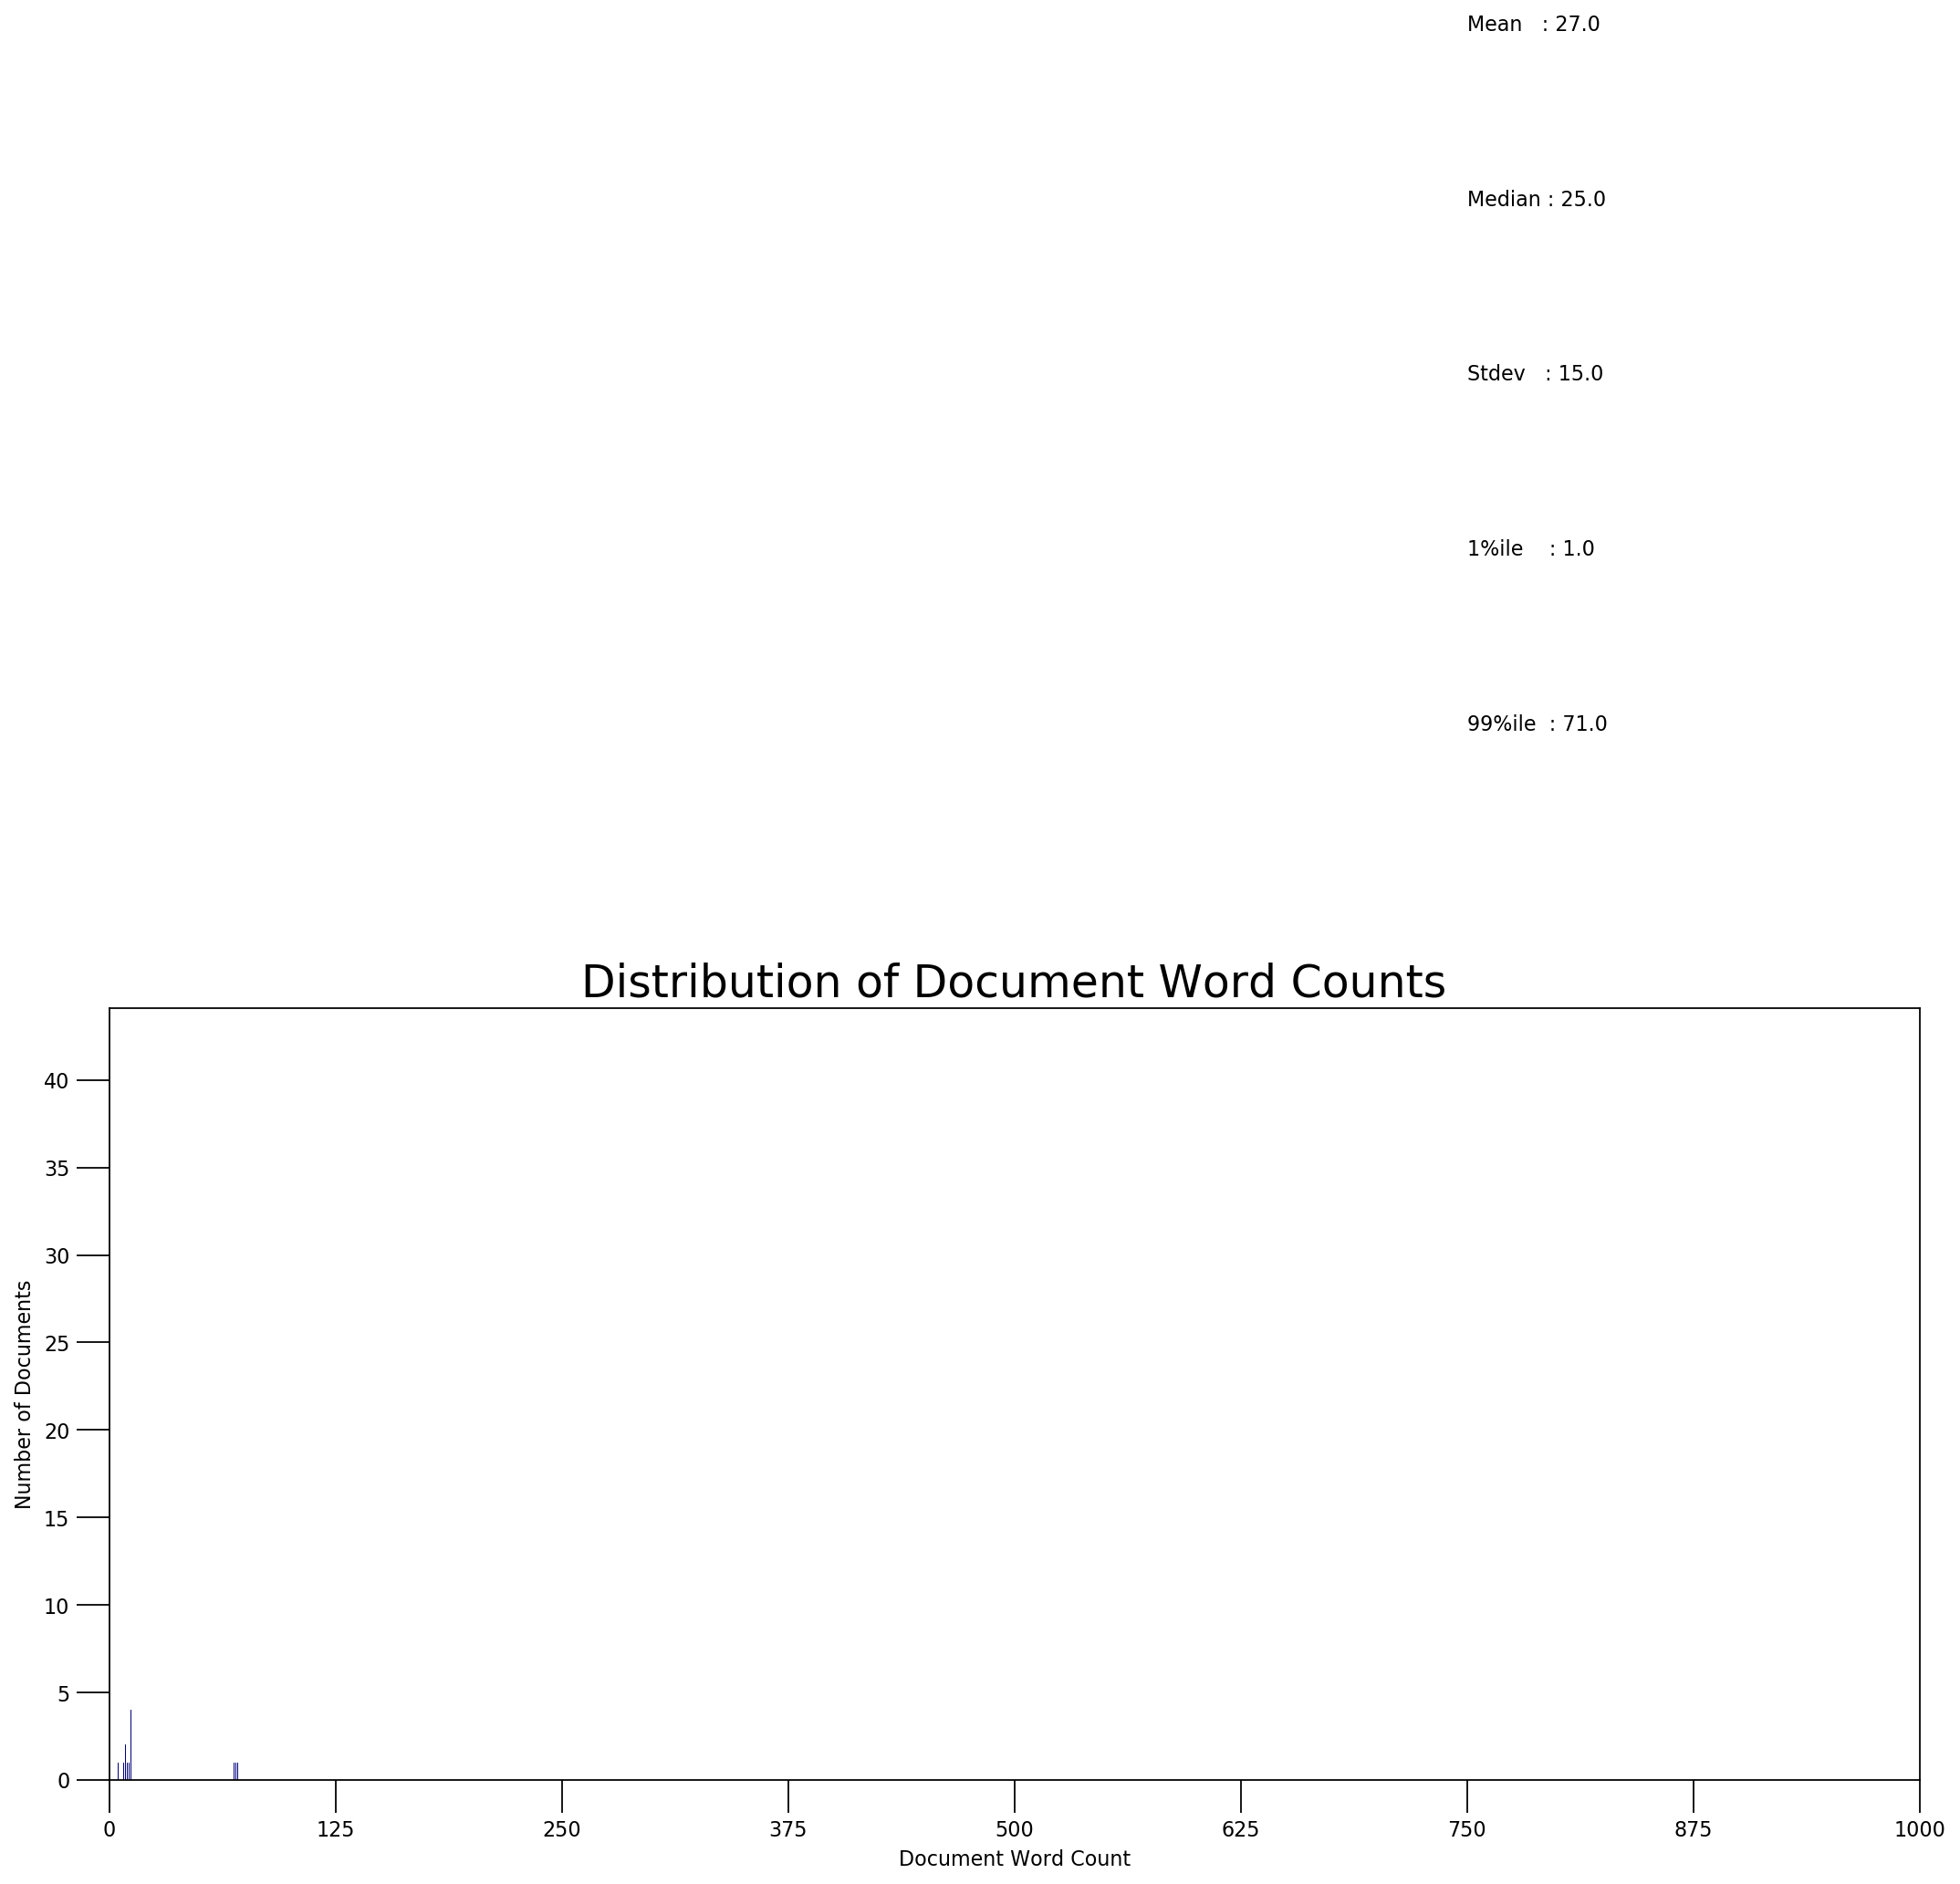

In [41]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



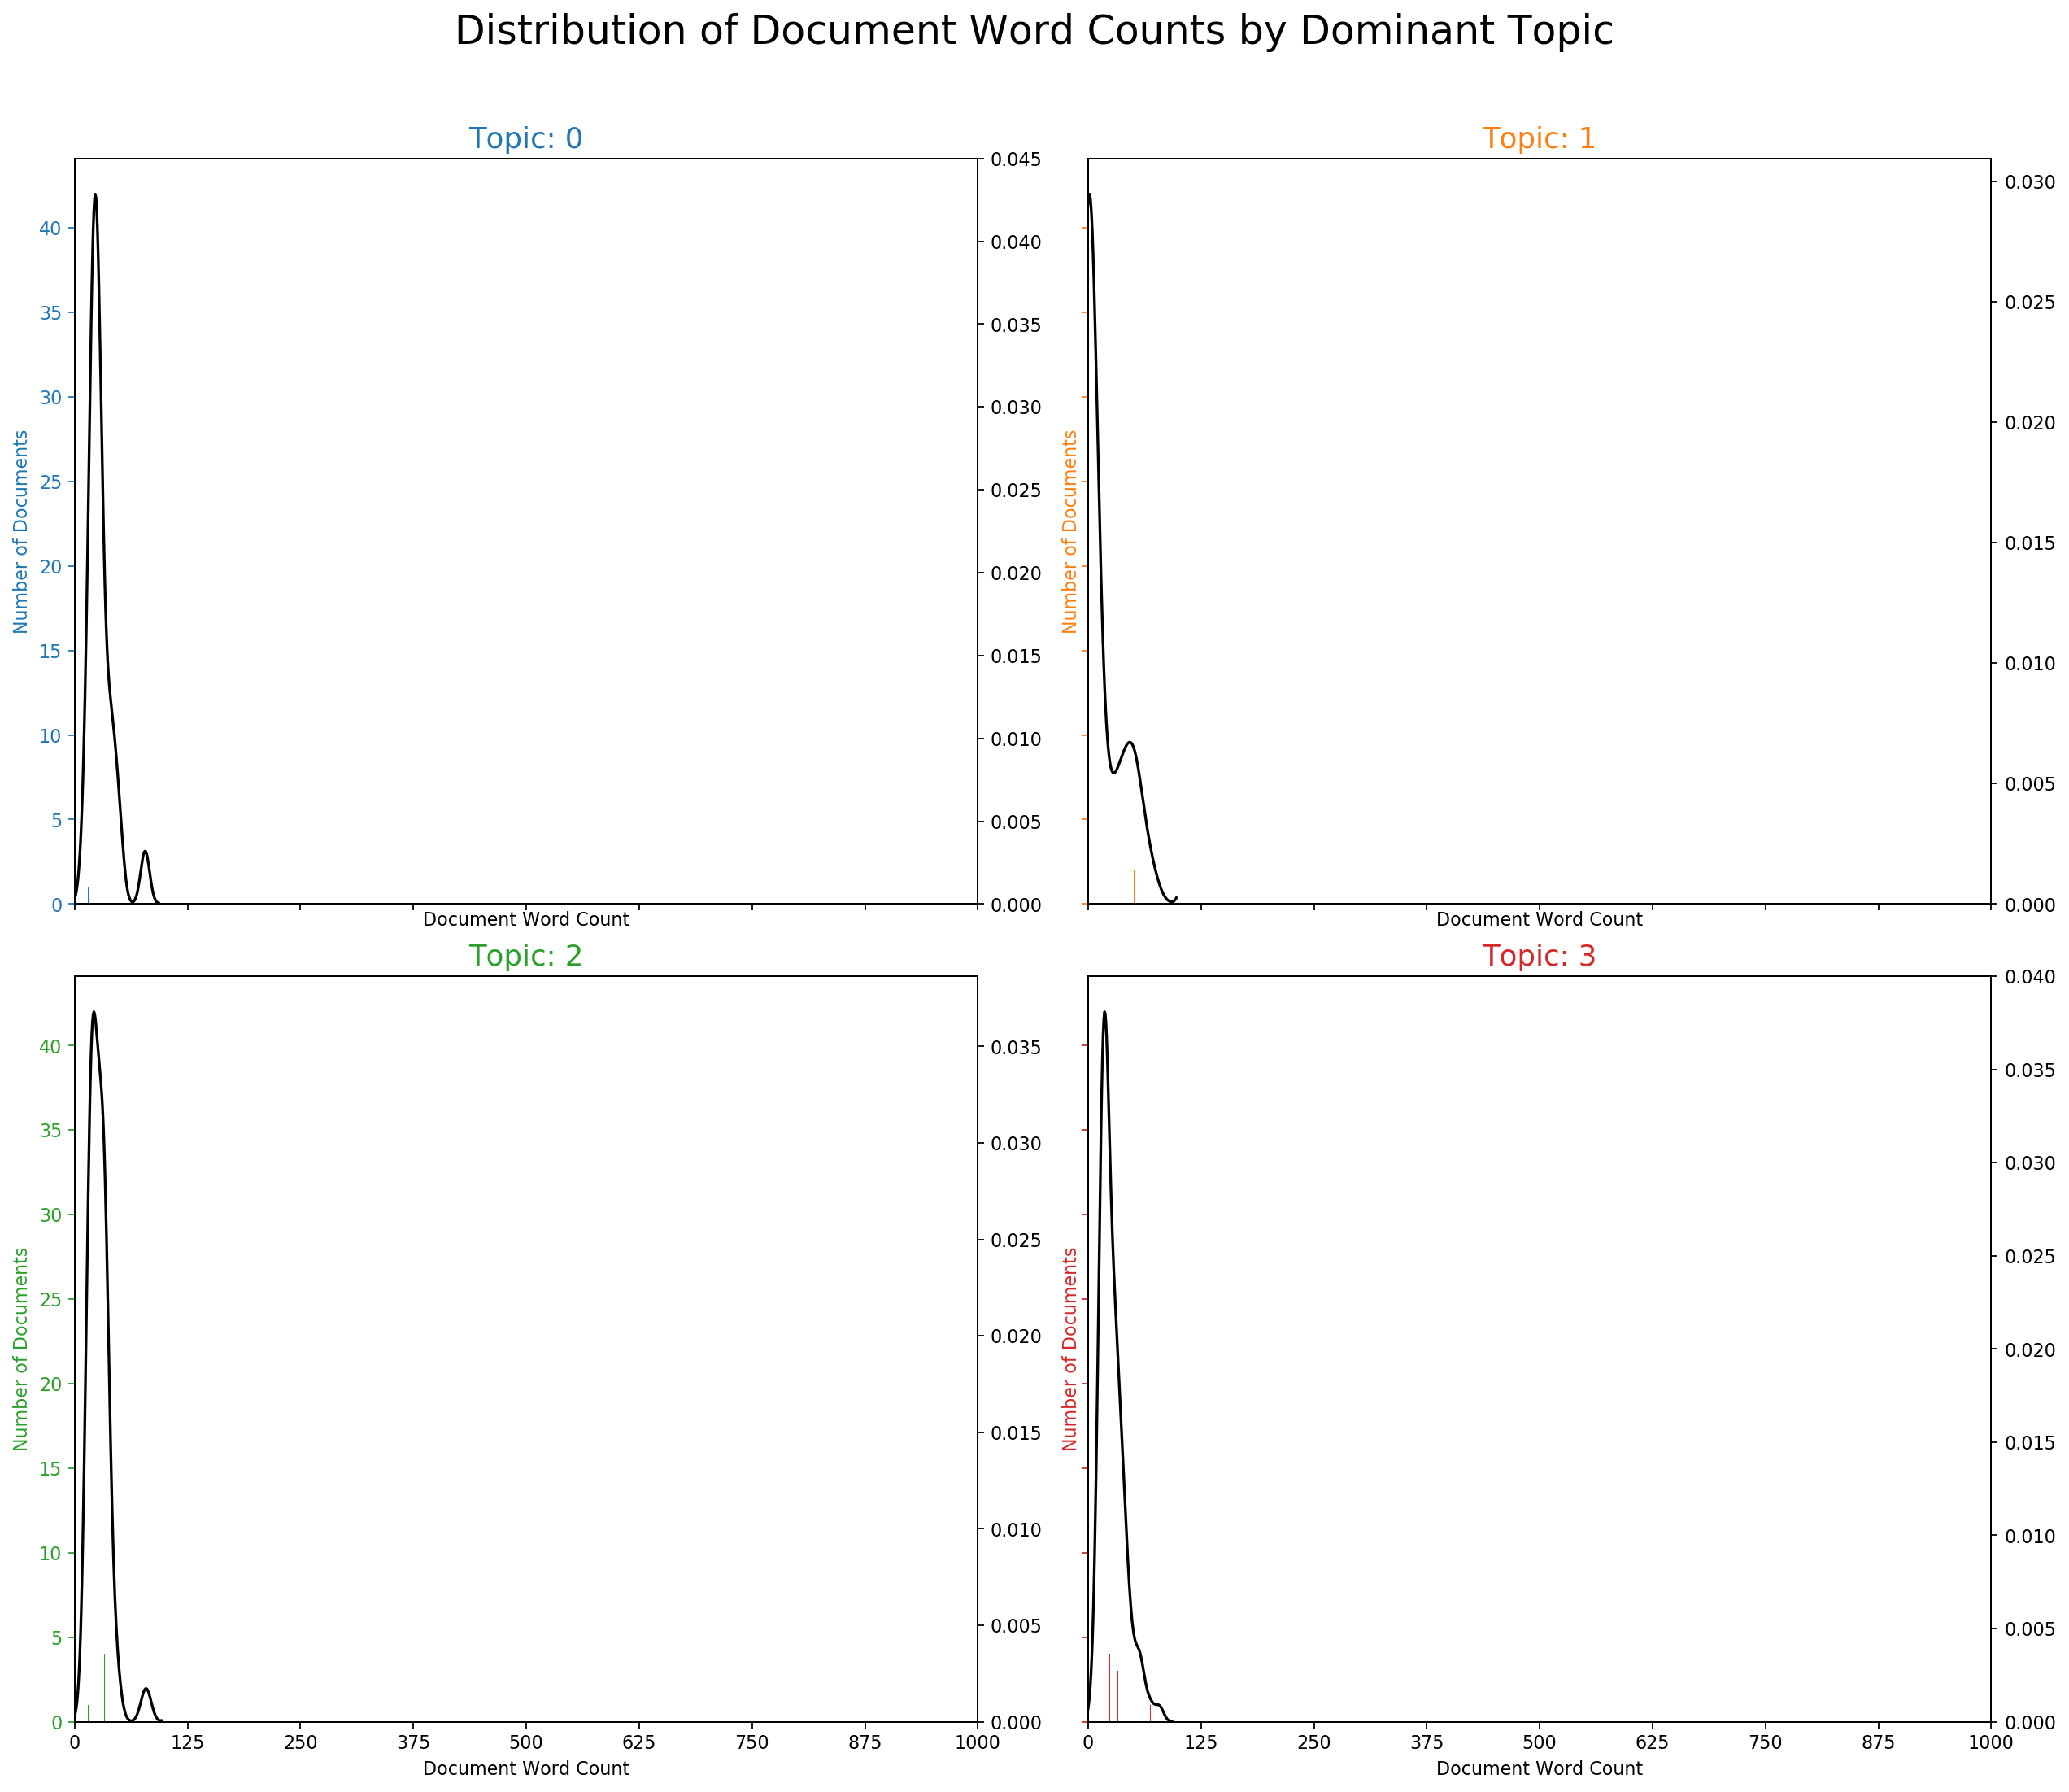

In [42]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

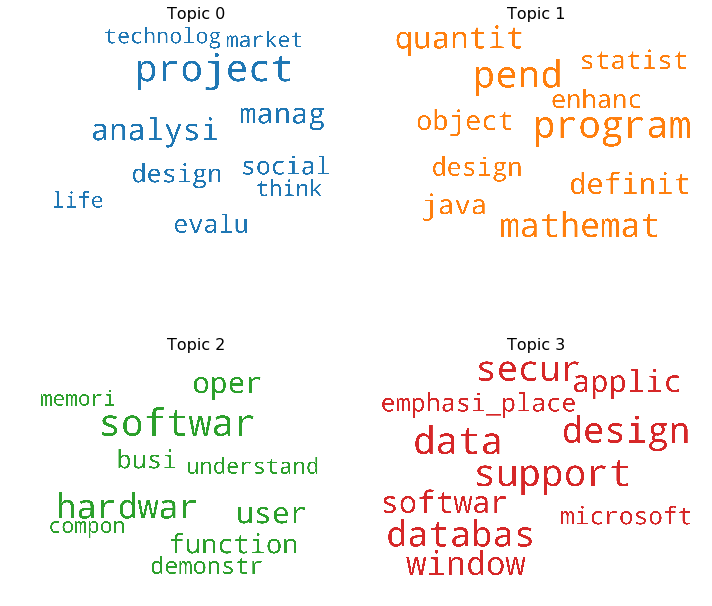

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

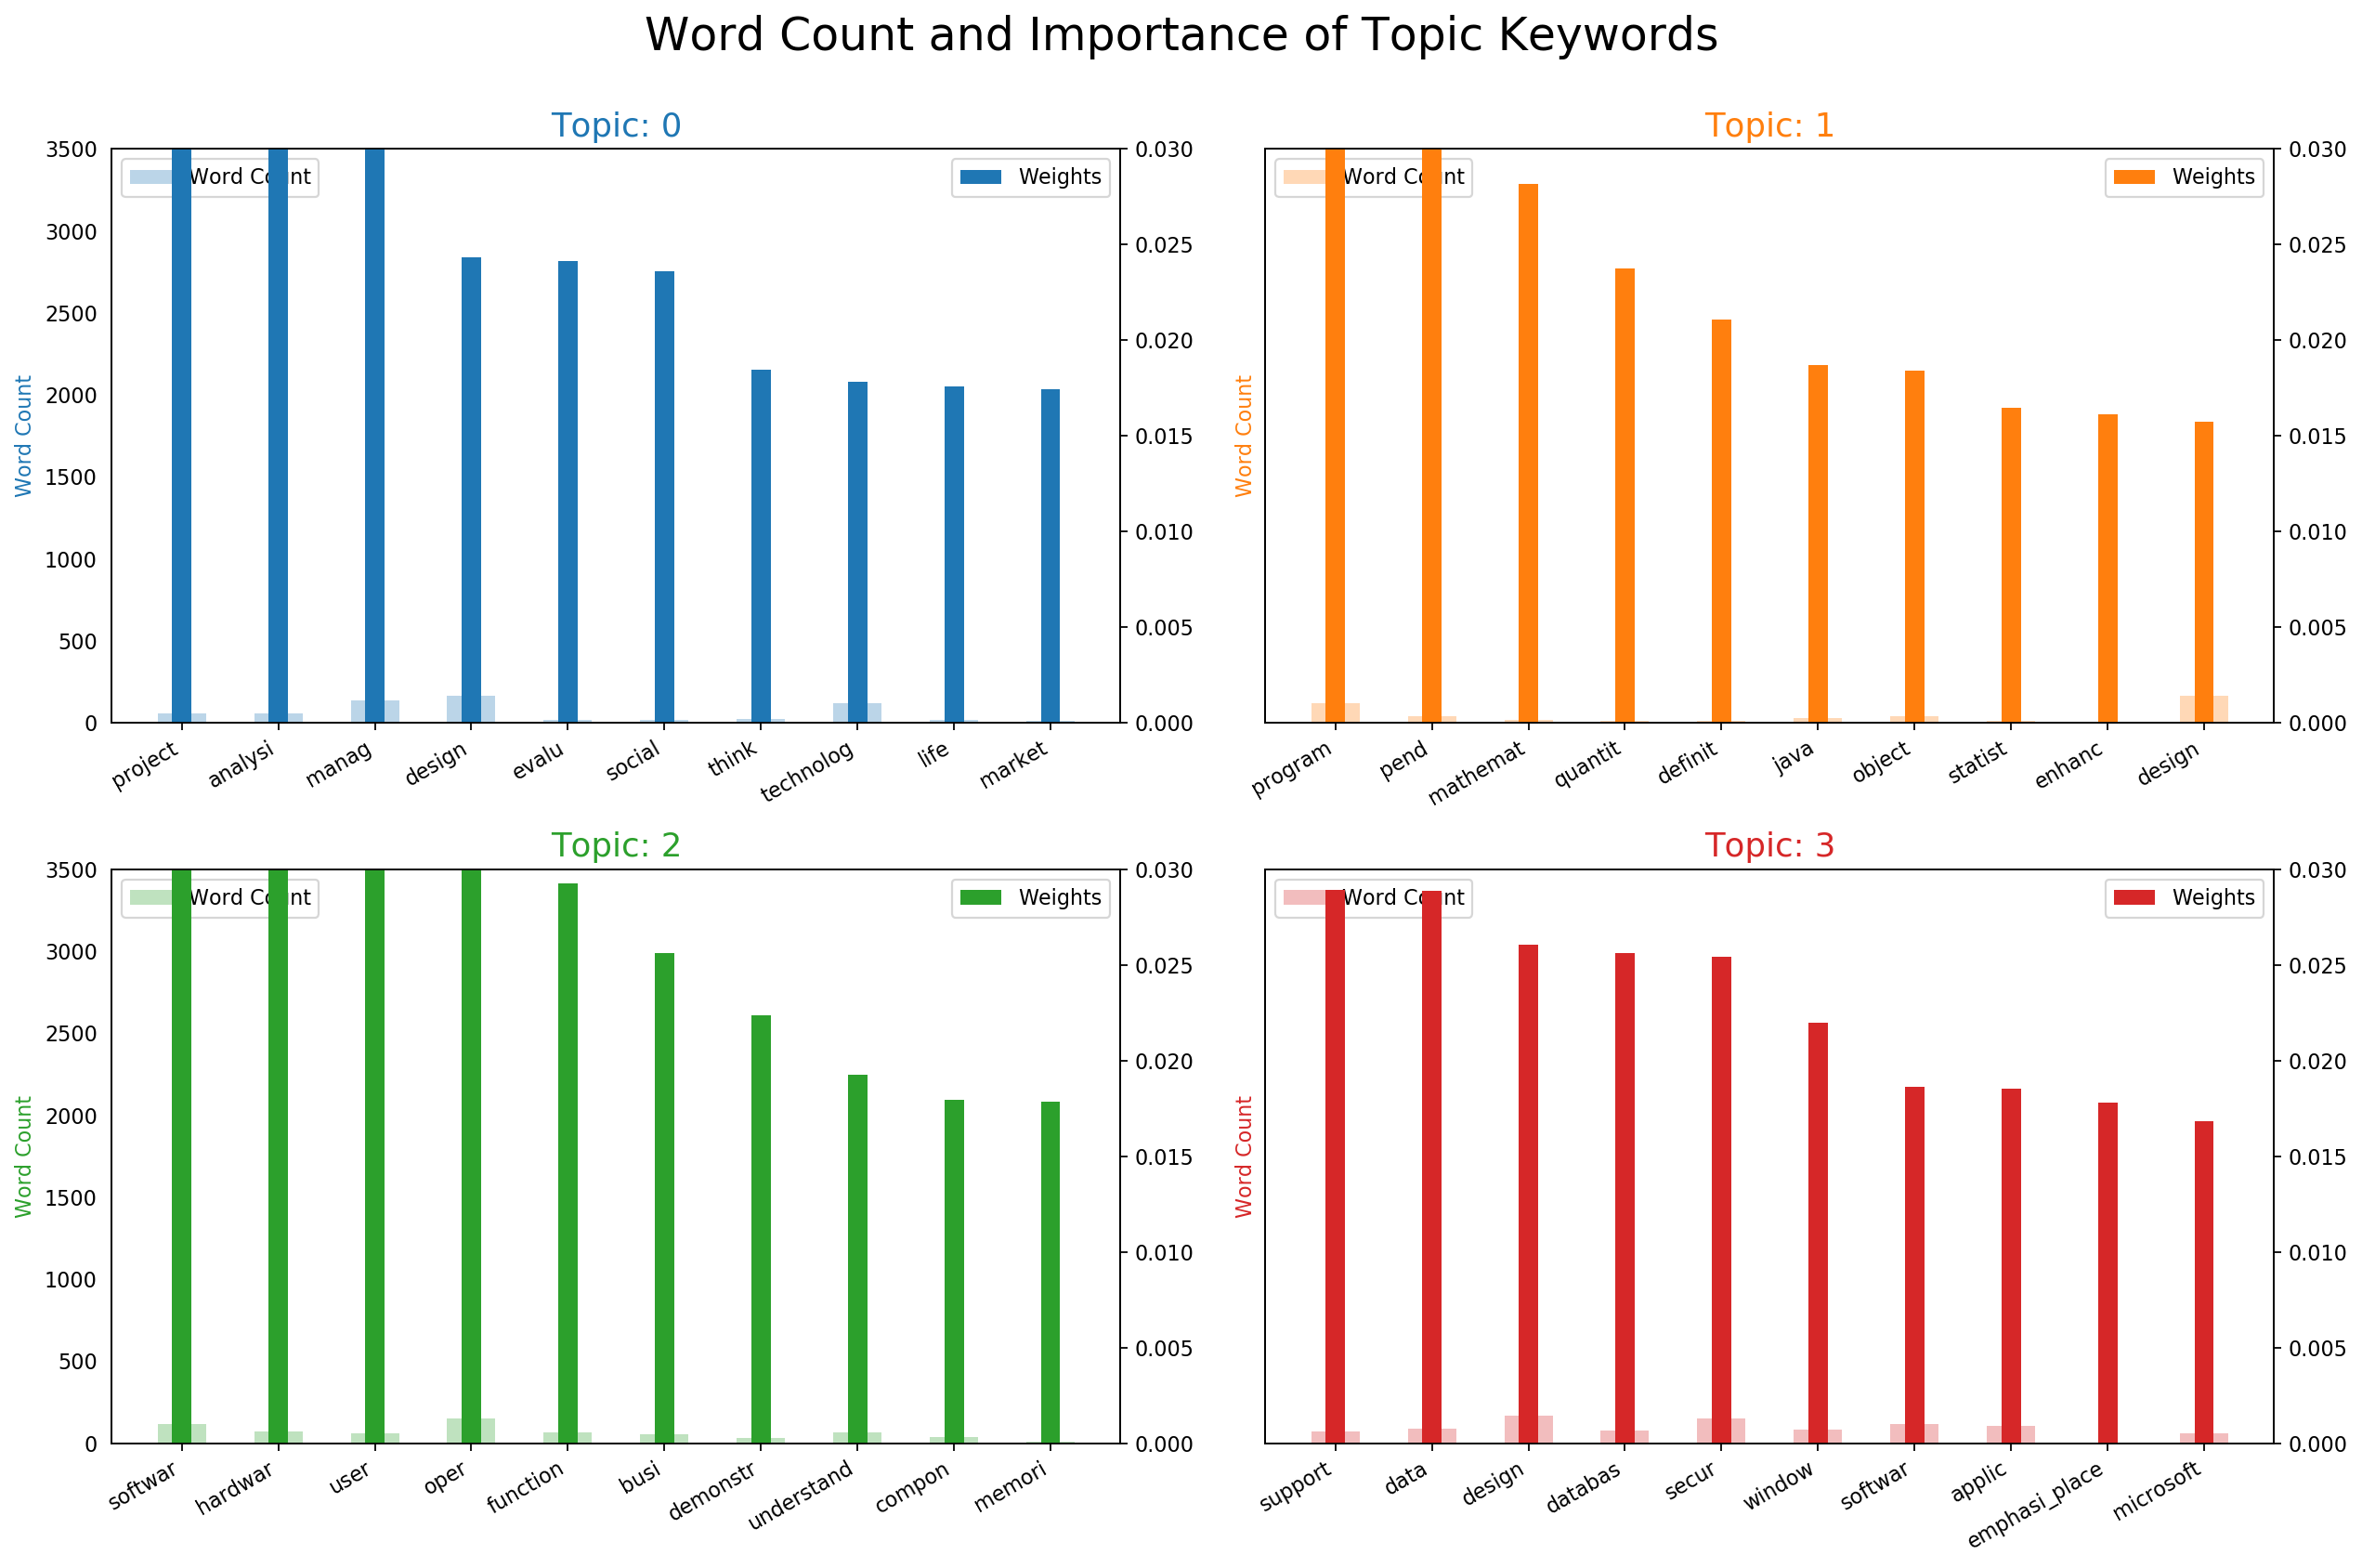

In [44]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

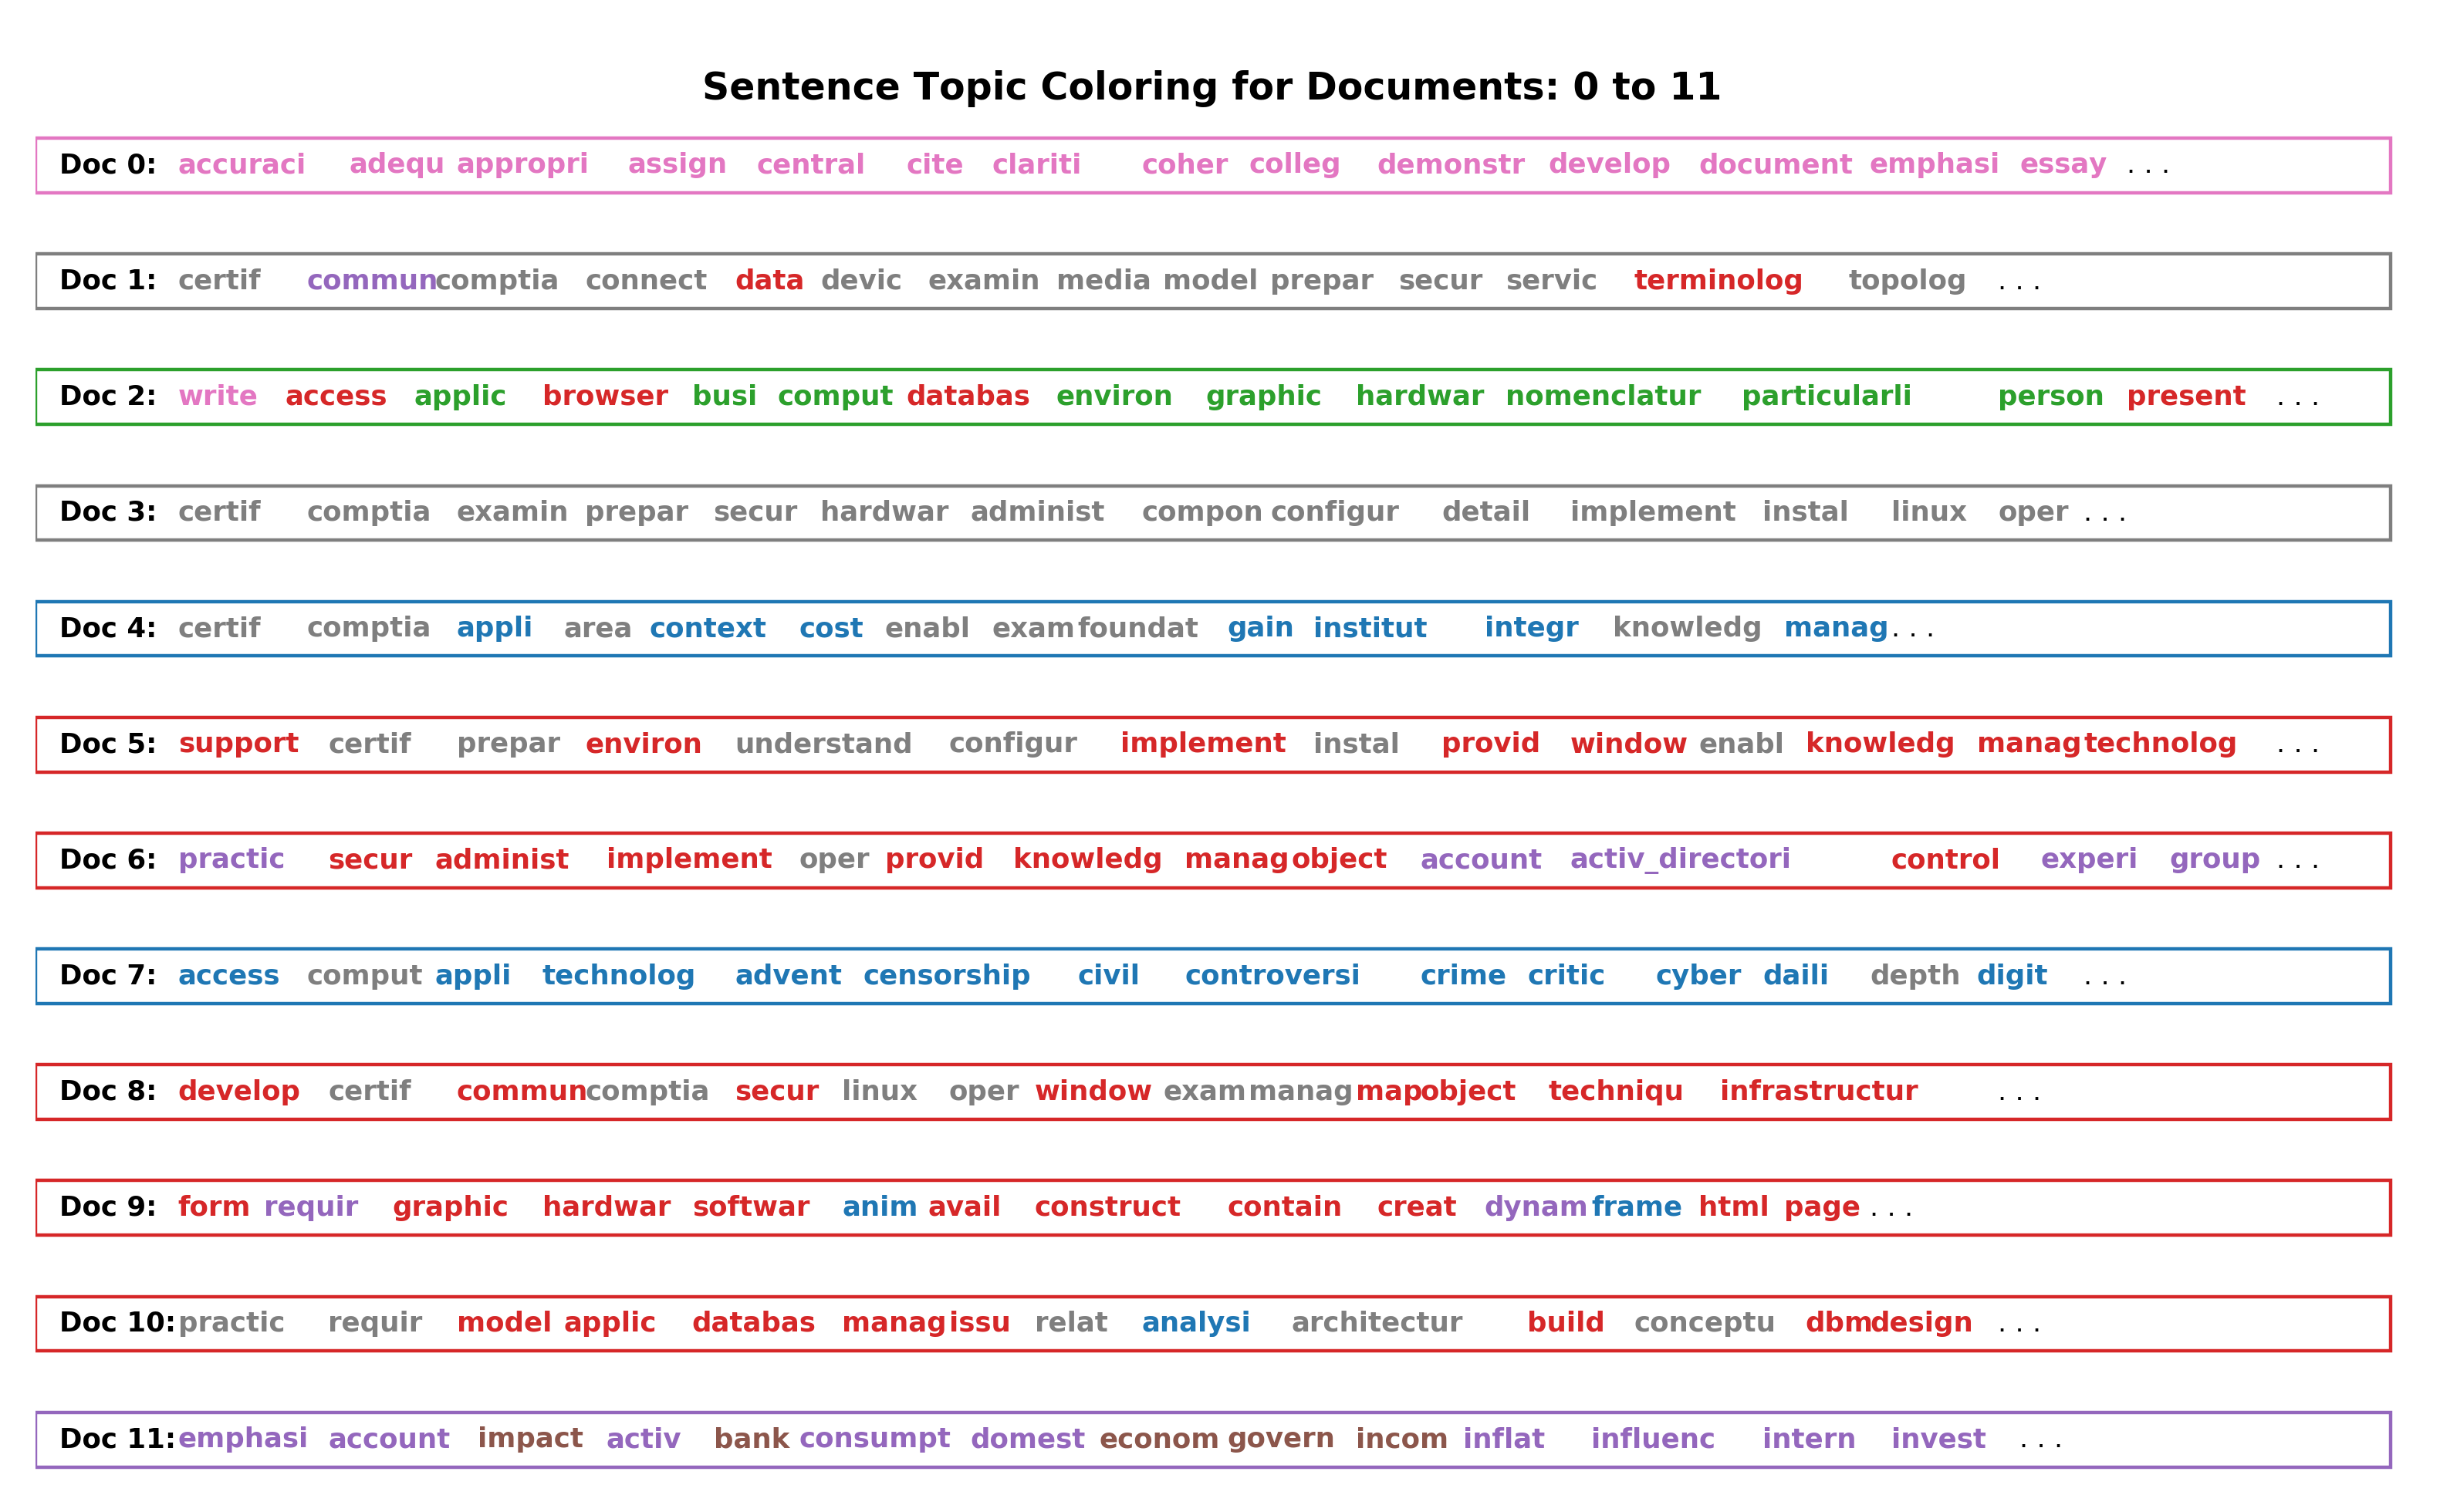

In [45]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [46]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

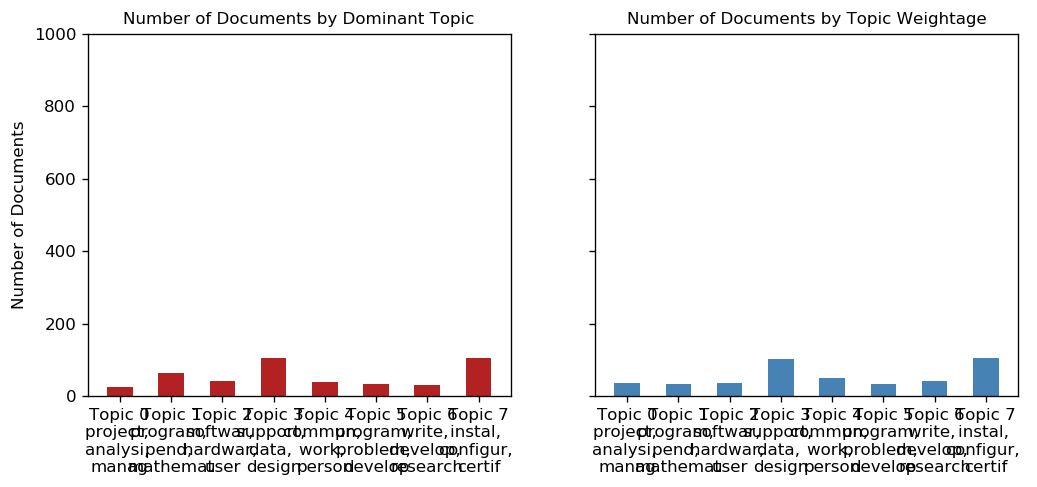

In [47]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [48]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 422 samples in 0.000s...
[t-SNE] Computed neighbors for 422 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 422 / 422
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.852623
[t-SNE] Error after 850 iterations: 0.369994


Loading BokehJS ...